In [1]:
pip install selenium 

Note: you may need to restart the kernel to use updated packages.


In [1]:
def insta_crawling(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url


In [2]:
from selenium import webdriver
import time

In [3]:
C:\Users\여승은\PycharmProjects\chromedriver_win32

SyntaxError: unexpected character after line continuation character (<ipython-input-3-5ad6e4df8bb9>, line 1)

In [4]:
driver = webdriver.Chrome("chromedriver.exe")

In [5]:
driver.get("https://www.instagram.com")

In [6]:
time.sleep(3) ##시간텀 설정

In [7]:
#로그인에 필요한 사항을 브라우저 제어를통해 입력합니다.
email = '*************'   ### 사용할 계정 정보 입력
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '***********' ### 비번 정보 수정
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [8]:
time.sleep(3)
word = "제주여행"
url = insta_crawling(word)
driver.get(url)
time.sleep(2)

In [9]:
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

In [10]:
import re
from bs4 import BeautifulSoup


In [11]:
def get_content(driver):
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    

    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
    # 정규표현식을 활용하여 해시태그를 가져옵니다.
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # 작성일자를 가져옵니다.
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # 좋아요 수를 가져옵니다.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보를 가져옵니다.
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 수집한 정보를 리스트로 저장합니다.
    data = [content, date, like, place, tags]
    return data


In [ ]:
def move_next(driver):

    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)


#함수를 차례대로 실행합니다.
select_first(driver)
results = [ ]
target = 500      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 2초 대기후 다음글로 넘어갑니다.
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    
#result적당히 출력해보기
print(results[:2])


#데이터프레임 만들고 엑셀로 저장하기
import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel('crawling_jeju.xlsx', index=False) 

In [ ]:
import pandas as pd
raw_total = pd.read_excel('crawling_Jeju.xlsx')
raw_total

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

In [59]:
if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

In [61]:
raw_total['tags']

0     ['#이번주까지가_청보리를만날_마지막기회😥찰랑찰랑', '#제주', '#가파도', '...
1                                             ['#노픽그램']
2             ['#무지개해안도로', '#제주도', '#여행스타그램', '#제주도여행']
3                     ['#올랄라파리', '#권농동커피플레이스', '#퀸즈가드']
4                    ['#니스', '#니스여행', '#jjomin_travel']
5                                                    []
6     ['#양양여행', '#써피비치', '#여행스타그램', '#봄여행', '#휴가', '...
7                                                    []
8                      ['#소유닌제주안돌오름', '#안돌오름', '#비밀의숲']
9     ['#여행스타그램왕만한', '#데일리룩', '#포항', '#바다', '#카페', '...
10                                                   []
11    ['#백패킹', '#백패커', '#캠핑', '#캠퍼', '#트레킹', '#하이킹',...
12    ['#여행스타그램', '#여행에미치다', '#사진스킬레벨업', '#근포마을땅굴', ...
13    ['#첫줄', '#그림', '#그림그리기', '#그림ᄋ...
14                                                   []
15    ['#백패커', '#백패킹', '#캠핑스타그램', '#캠핑', '#캠퍼', '#여행...
16    ['#하이원', '#하이원리조트', '#high1', '#하늘길', '#웰니스', ...
17    ['#오늘의여행', '#오여_아산', '#아산가볼만한곳', '#아산여행', 

In [62]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [63]:
tags_total

['#이번주까지가_청보리를만날_마지막기회😥찰랑찰랑',
 '#제주',
 '#가파도',
 '#여행다녀왔습니다',
 '#여행다녀왔습니다',
 '#여행다녀왔습니다_국내',
 '#여행다녀왔습니다_제주',
 '#travelmenu1⠀',
 '#제주가파도',
 '#가파도청보리밭',
 '#제주보리밭',
 '#보리밭',
 '#청보리',
 '#청보리밭',
 '#황금보리',
 '#황금보리밭',
 '#제주도여행',
 '#제주도가볼만한곳',
 '#제주여행지추천',
 '#제주핫플',
 '#국내여행',
 '#국내여행추천',
 '#여행',
 '#여행스타그램',
 '#노픽그램',
 '#무지개해안도로',
 '#제주도',
 '#여행스타그램',
 '#제주도여행',
 '#올랄라파리',
 '#권농동커피플레이스',
 '#퀸즈가드',
 '#니스',
 '#니스여행',
 '#jjomin_travel',
 '',
 '#양양여행',
 '#써피비치',
 '#여행스타그램',
 '#봄여행',
 '#휴가',
 '#surfyybeach',
 '#daily',
 '',
 '#소유닌제주안돌오름',
 '#안돌오름',
 '#비밀의숲',
 '#여행스타그램왕만한',
 '#데일리룩',
 '#포항',
 '#바다',
 '#카페',
 '#플라워원피스',
 '#반팔원피스',
 '#여행룩',
 '#벌룬원피스',
 '',
 '#백패킹',
 '#백패커',
 '#캠핑',
 '#캠퍼',
 '#트레킹',
 '#하이킹',
 '#등산',
 '#아웃도어',
 '#여행',
 '#여행스타그램',
 '#여행에미치다',
 '#등산스타그램',
 '#여행스타그램',
 '#여행에미치다',
 '#사진스킬레벨업',
 '#근포마을땅굴',
 '#근포동굴샷',
 '#그림자놀이',
 '#거제',
 '#첫줄',
 '#그림',
 '#그림그리기',
 '#그림연습',
 '#색칠',
 '#색칠연습',
 '#스케치',
 '#따라그리기',
 '#그림스타그램',
 '#취미',
 '#drawing',
 

In [69]:
from collections import Counter
tag_counts = Counter(tags_total)

tag_counts

Counter({'#이번주까지가_청보리를만날_마지막기회😥찰랑찰랑': 1,
         '#제주': 1,
         '#가파도': 1,
         '#여행다녀왔습니다': 5,
         '#여행다녀왔습니다_국내': 2,
         '#여행다녀왔습니다_제주': 1,
         '#travelmenu1⠀': 2,
         '#제주가파도': 1,
         '#가파도청보리밭': 1,
         '#제주보리밭': 1,
         '#보리밭': 1,
         '#청보리': 1,
         '#청보리밭': 1,
         '#황금보리': 1,
         '#황금보리밭': 1,
         '#제주도여행': 2,
         '#제주도가볼만한곳': 1,
         '#제주여행지추천': 1,
         '#제주핫플': 1,
         '#국내여행': 3,
         '#국내여행추천': 3,
         '#여행': 4,
         '#여행스타그램': 16,
         '#노픽그램': 1,
         '#무지개해안도로': 1,
         '#제주도': 1,
         '#올랄라파리': 1,
         '#권농동커피플레이스': 1,
         '#퀸즈가드': 1,
         '#니스': 1,
         '#니스여행': 1,
         '#jjomin_travel': 1,
         '': 21,
         '#양양여행': 1,
         '#써피비치': 1,
         '#봄여행': 2,
         '#휴가': 1,
         '#surfyybeach': 1,
         '#daily': 1,
         '#소유닌제주안돌오름': 1,
         '#안돌오름': 1,
         '#비밀의숲': 1,
         '#여행스타그램왕만한': 1,
         '#데일

In [73]:
tag_total_selected = []

STOPWORDS = ['#여행스타그램', '#여행']
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
# 상위 100개 단어 추출하기        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(100)

[('', 21),
 ('#여행다녀왔습니다', 5),
 ('#가족여행', 4),
 ('#국내여행', 3),
 ('#국내여행추천', 3),
 ('#여행에미치다', 3),
 ('#캠핑스타그램', 3),
 ('#강원도', 3),
 ('#운동스타그램', 3),
 ('#커플여행', 3),
 ('#데일리', 3),
 ('#여행다녀왔습니다_국내', 2),
 ('#travelmenu1⠀', 2),
 ('#제주도여행', 2),
 ('#봄여행', 2),
 ('#카페', 2),
 ('#백패킹', 2),
 ('#백패커', 2),
 ('#캠핑', 2),
 ('#캠퍼', 2),
 ('#여행기록', 2),
 ('#야경', 2),
 ('#강원도여행', 2),
 ('#힐링', 2),
 ('#koreatravel', 2),
 ('#travel', 2),
 ('#사진', 2),
 ('#사진스타그램', 2),
 ('#traveladdict', 2),
 ('#명품가방', 2),
 ('#실제배송실사', 2),
 ('#운동', 2),
 ('#헬스', 2),
 ('#필라테스', 2),
 ('#필라테스그램', 2),
 ('#연애', 2),
 ('#데이트', 2),
 ('#커피타임', 2),
 ('#퇴근', 2),
 ('#저녁', 2),
 ('#애스타그램', 2),
 ('#까르띠에산토스', 2),
 ('#까르띠에산토스시계', 2),
 ('#까르띠에산토스콤비', 2),
 ('#산토스드까르띠에', 2),
 ('#산토스콤비', 2),
 ('#산토스', 2),
 ('#산토스시계', 2),
 ('#이번주까지가_청보리를만날_마지막기회😥찰랑찰랑', 1),
 ('#제주', 1),
 ('#가파도', 1),
 ('#여행다녀왔습니다_제주', 1),
 ('#제주가파도', 1),
 ('#가파도청보리밭', 1),
 ('#제주보리밭', 1),
 ('#보리밭', 1),
 ('#청보리', 1),
 ('#청보리밭', 1),
 ('#황금보리', 1),
 ('#황금보리밭', 1),
 ('#제주도가볼만한곳', 1),
 ('#제주여행지추천', 

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

In [75]:
if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

In [76]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(50))
tag_counts_df.columns = ['tags', 'counts']

C:\jupter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\jupter\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\jupter\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\jupter\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128549 missing from current font.
  font.set_text(s, 0, flags=flags)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/gbtriptag-barplot.png'

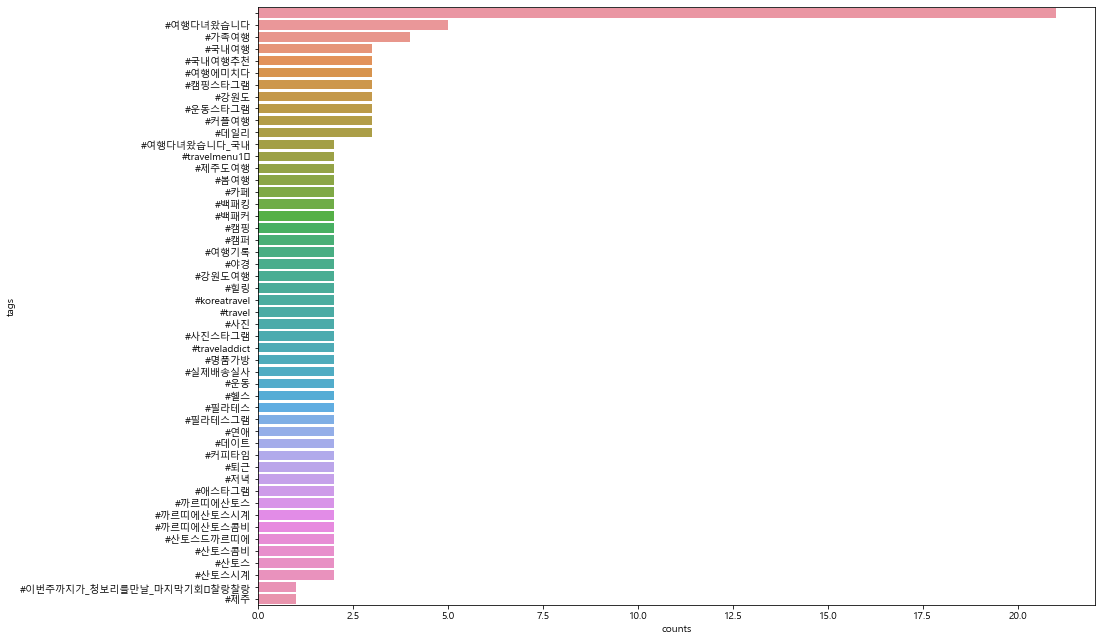

In [77]:
plt.figure(figsize =(15,11))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)
plt.savefig('C:/Users/Desktop/gbtriptag-barplot.png')

In [80]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [79]:
pip install wordcloud

In [81]:
if platform.system() == 'Windows':   
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":  
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/gbtriptag-wordcloud.png'

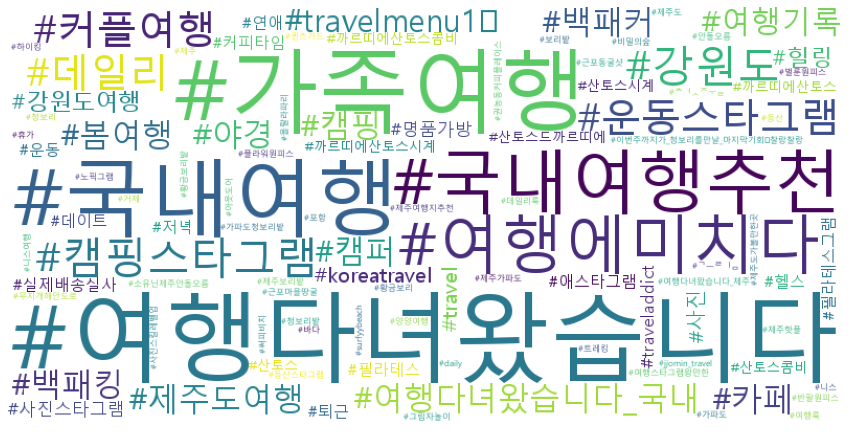

In [82]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:/Users/Desktop/gbtriptag-wordcloud.png')  